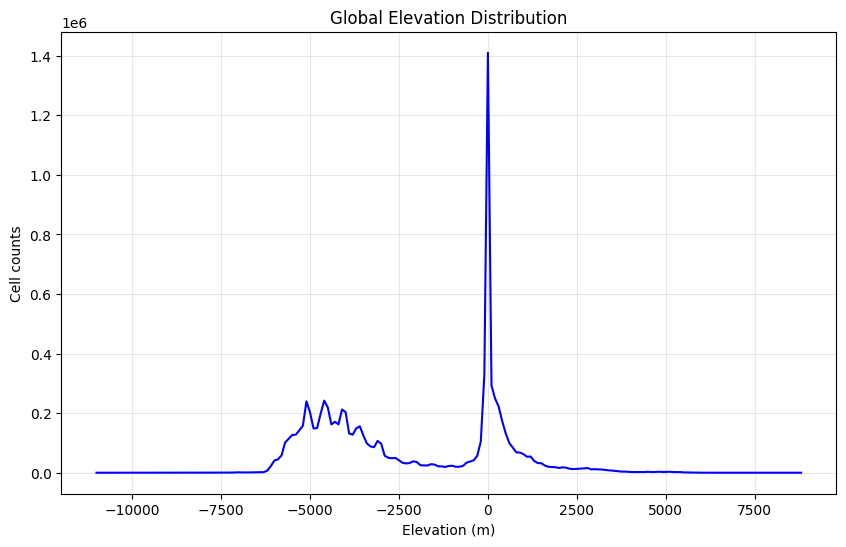

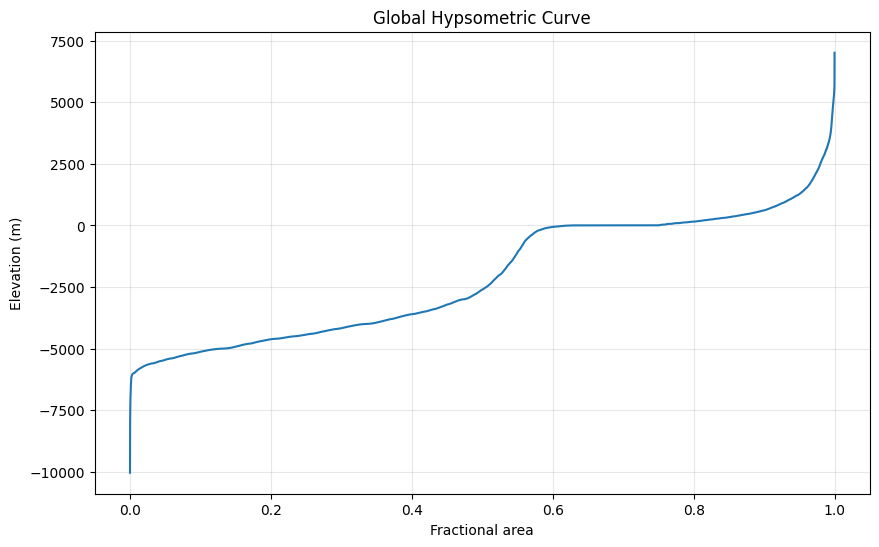

In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# This DEM is reprojected to some Global Earth DEM centred on Greenwich maybe? Got the idea from gis stackexchange
dem_path = "/home/anubrata/Landscapes/world_global.tif" 
with rasterio.open(dem_path) as src:
    dem = src.read(1, masked=True)

# So this does two things - Firstly it drops the NaN or NoData Values and secondly it flattens the 2D array to a 1D array to plot the stuff easily
elev = dem.compressed()

bins = np.arange(-11000, 9000, 100)
hist, bin_edges = np.histogram(elev, bins=bins)

plt.figure(figsize=(10,6))
plt.plot(bin_edges[:-1], hist, color="blue")

plt.title("Global Elevation Distribution")
plt.xlabel("Elevation (m)")
plt.ylabel("Cell counts")
plt.grid(True, alpha=0.3)
plt.show()

elev_sorted = np.sort(elev)
n = len(elev_sorted)

# Cumulative Area
area_fraction = np.linspace(0, 1, n)

plt.figure(figsize=(10,6))
plt.plot(area_fraction, elev_sorted)
plt.title("Global Hypsometric Curve")
plt.xlabel("Fractional area")
plt.ylabel("Elevation (m)")
plt.grid(True, alpha=0.3)
plt.show()
